# spotipy

In [ ]:
import spotipy
import time
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

# Set up your Spotify API credentials
client_id = 'cf20a10bace943d8ad8ea20e84b833a7'
client_secret = '071dba6077e14ceebdcf79b86eeff466'

# Initialize Spotipy with your credentials
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# List of playlist IDs (you can find these in the Spotify playlist URLs)
playlist_ids = ['4PZLNJuqhM2Ab3YK0y3RfI', '4KeGKpEuJv9wV4ehUDIsek', '0yOCqgciOhCKbXjqTRVgrF','3N8GLinlhEFYVsLcm3uNje','3KAZhG2sOtWhUxkXg222jQ','6tfXVOHGm6EDgHT84OYE5Y','37i9dQZF1EIUGRgRN2wdDR']

# Initialize an empty list to store track information
track_info_list = []


# Loop through each playlist
for playlist_id in playlist_ids:
    # Get the playlist details
    playlist_details = sp.playlist(playlist_id)

    # Get the playlist name
    playlist_name = playlist_details['name']

    # Get the playlist tracks
    playlist_tracks = sp.playlist_tracks(playlist_id)

    # Extract track information for each track in the playlist
    for track in playlist_tracks['items']:

        track_details = sp.track(track['track']['id'])

        # time.sleep(5)
        album_details = sp.album(track_details['album']['id'])

        # time.sleep(50)
        audio_features = sp.audio_features([track['track']['id']])[0]

        # time.sleep(5)
        artist_details = sp.artist(track_details['artists'][0]['id'])

        track_info = {
            'Track Name': track_details['name'],
            'Artist(s)': ', '.join(artist['name'] for artist in track_details['artists']),
            'Album': track_details['album']['name'],
            'Release Date': track_details['album']['release_date'],
            'Track Popularity': track_details['popularity'],
            'Duration (ms)': track_details['duration_ms'],
            'Tempo (BPM)': audio_features['tempo'],
            'Danceability': audio_features['danceability'],
            'Energy': audio_features['energy'],
            'Key': audio_features['key'],
            'Loudness': audio_features['loudness'],
            'Speechiness': audio_features['speechiness'],
            'Acousticness': audio_features['acousticness'],
            'Instrumentalness': audio_features['instrumentalness'],
            'Liveness': audio_features['liveness'],
            'Valence': audio_features['valence'],
            'Time Signature': audio_features['time_signature'],
            'Genres': ', '.join(artist_details['genres']),
            'Artist Popularity': artist_details['popularity'],
            'Playlist_Name': playlist_name  # Add playlist name to track info
        }
        track_info_list.append(track_info)


# Create DataFrame from track information
df = pd.DataFrame(track_info_list)

In [ ]:
df.to_csv('spotifydf1.csv')

# EDA

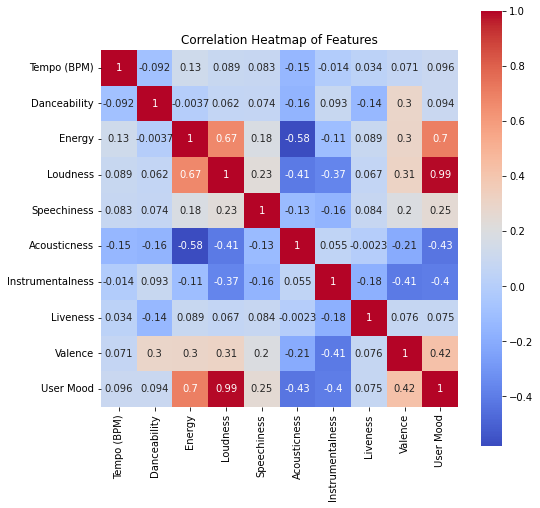

In [30]:
import matplotlib.pyplot as plt

# can you add a scatterplot with all the numerical features? 

# Select numerical columns
numeric_df = df.select_dtypes(include='float64')
corr = numeric_df.corr()

plt.figure(figsize=(8,8))

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()

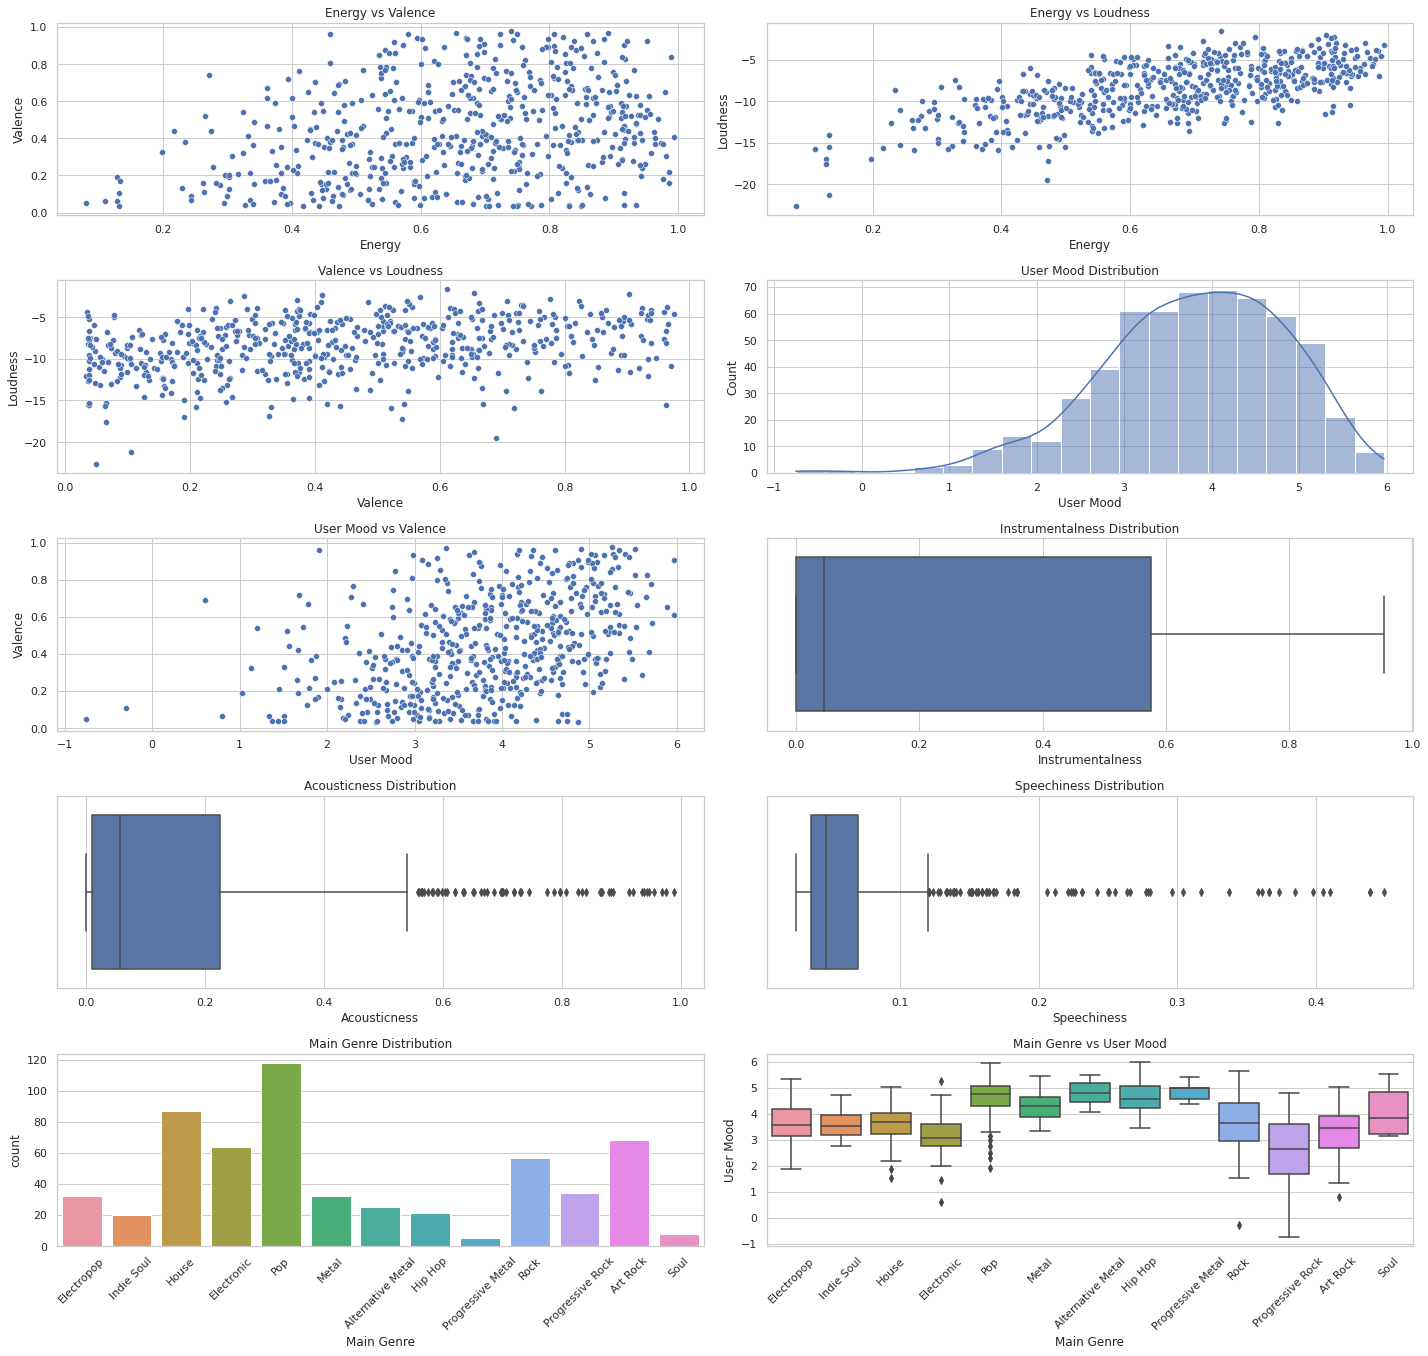

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create subplots for better organization
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 19))

# Energy, Valence, Loudness
sns.scatterplot(x='Energy', y='Valence', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Energy vs Valence')

sns.scatterplot(x='Energy', y='Loudness', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Energy vs Loudness')

sns.scatterplot(x='Valence', y='Loudness', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Valence vs Loudness')

# User Mood
sns.histplot(df['User Mood'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('User Mood Distribution')

# Cluster (Categorical)
sns.scatterplot(x='User Mood', y='Valence', data=df, ax=axes[2, 0])
axes[2, 0].set_title('User Mood vs Valence')

# Instrumentalness, Acousticness, Speechiness
sns.boxplot(x='Instrumentalness', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Instrumentalness Distribution')

sns.boxplot(x='Acousticness', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Acousticness Distribution')

sns.boxplot(x='Speechiness', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Speechiness Distribution')

# Main Genre
sns.countplot(x='Main Genre', data=df, ax=axes[4, 0])
axes[4, 0].set_title('Main Genre Distribution')
axes[4, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Main Genre', y='User Mood', data=df, ax=axes[4, 1])
axes[4, 1].set_title('Main Genre vs User Mood')
axes[4, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Hypothesis

In [14]:
from scipy.stats import pearsonr

# Significance level
alpha = 0.05

# Hypothesis testing for Valence and Energy
corr_valence_energy, p_valence_energy = pearsonr(df['Valence'], df['Energy'])
print(f"Correlation between Valence and Energy: {corr_valence_energy}")
print(f"P-value: {p_valence_energy}")
if p_valence_energy < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Valence and Energy.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Valence and Energy.")

# Hypothesis testing for Valence and Loudness
corr_valence_loudness, p_valence_loudness = pearsonr(df['Valence'], df['Loudness'])
print(f"\nCorrelation between Valence and Loudness: {corr_valence_loudness}")
print(f"P-value: {p_valence_loudness}")
if p_valence_loudness < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Valence and Loudness.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Valence and Loudness.")

# Hypothesis testing for Energy and Loudness
corr_energy_loudness, p_energy_loudness = pearsonr(df['Energy'], df['Loudness'])
print(f"\nCorrelation between Energy and Loudness: {corr_energy_loudness}")
print(f"P-value: {p_energy_loudness}")
if p_energy_loudness < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Energy and Loudness.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Energy and Loudness.")

Correlation between Valence and Energy: 0.2972150173845605
P-value: 4.135200550270975e-13
Reject the null hypothesis: There is a significant relationship between Valence and Energy.

Correlation between Valence and Loudness: 0.3111425092283388
P-value: 2.777230151828632e-14
Reject the null hypothesis: There is a significant relationship between Valence and Loudness.

Correlation between Energy and Loudness: 0.6722941999527997
P-value: 2.4177380404204866e-76
Reject the null hypothesis: There is a significant relationship between Energy and Loudness.


In [8]:
from scipy.stats import pearsonr

# Significance level
alpha = 0.05

# Hypothesis testing for User Mood and Valence
corr_user_mood_valence, p_user_mood_valence = pearsonr(df['User Mood'], df['Valence'])
print(f"Correlation between User Mood and Valence: {corr_user_mood_valence}")
print(f"P-value: {p_user_mood_valence}")
if p_user_mood_valence < alpha:
    print("Reject the null hypothesis: There is a significant relationship between User Mood and Valence.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between User Mood and Valence.")

# Hypothesis testing for User Mood and Energy
corr_user_mood_energy, p_user_mood_energy = pearsonr(df['User Mood'], df['Energy'])
print(f"\nCorrelation between User Mood and Energy: {corr_user_mood_energy}")
print(f"P-value: {p_user_mood_energy}")
if p_user_mood_energy < alpha:
    print("Reject the null hypothesis: There is a significant relationship between User Mood and Energy.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between User Mood and Energy.")

# Hypothesis testing for User Mood and Loudness
corr_user_mood_loudness, p_user_mood_loudness = pearsonr(df['User Mood'], df['Loudness'])
print(f"\nCorrelation between User Mood and Loudness: {corr_user_mood_loudness}")
print(f"P-value: {p_user_mood_loudness}")
if p_user_mood_loudness < alpha:
    print("Reject the null hypothesis: There is a significant relationship between User Mood and Loudness.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between User Mood and Loudness.")

Correlation between User Mood and Valence: -0.42754167652168446
P-value: 8.882248809304044e-27
Reject the null hypothesis: There is a significant relationship between User Mood and Valence.

Correlation between User Mood and Energy: 0.6985076693013191
P-value: 9.717019356572274e-85
Reject the null hypothesis: There is a significant relationship between User Mood and Energy.

Correlation between User Mood and Loudness: 0.9922190450200982
P-value: 0.0
Reject the null hypothesis: There is a significant relationship between User Mood and Loudness.


In [23]:
import statsmodels.api as sm

# Add a constant term to the independent variable
X_valence = sm.add_constant(df['Valence'])
X_user_mood = sm.add_constant(df['User Mood'])

# Fit the OLS regression models
model_valence = sm.OLS(df['Energy'], X_valence).fit()
model_user_mood = sm.OLS(df['Energy'], X_user_mood).fit()

# Print summaries of the regression results
print("Regression Analysis for Valence:")
print(model_valence.summary())

print("\nRegression Analysis for User Mood:")
print(model_user_mood.summary())

# Extract p-values for 'Valence' and 'User Mood'
p_value_valence = model_valence.pvalues['Valence']
p_value_user_mood = model_user_mood.pvalues['User Mood']

# Hypothesis testing for Valence
alpha = 0.05
if p_value_valence < alpha:
    print("\nReject the null hypothesis: 'Valence' is a significant predictor of 'Energy'.")
else:
    print("\nFail to reject the null hypothesis: 'Valence' is not a significant predictor of 'Energy'.")

# Hypothesis testing for User Mood
if p_value_user_mood < alpha:
    print("\nReject the null hypothesis: 'User Mood' is a significant predictor of 'Energy'.")
else:
    print("\nFail to reject the null hypothesis: 'User Mood' is not a significant predictor of 'Energy'.")

Regression Analysis for Valence:
                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     55.13
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           4.14e-13
Time:                        07:25:40   Log-Likelihood:                 153.44
No. Observations:                 571   AIC:                            -302.9
Df Residuals:                     569   BIC:                            -294.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.56

In [35]:
from scipy.stats import shapiro, normaltest, anderson

stat_shapiro, p_shapiro = shapiro(df['User Mood'])
stat_normaltest, p_normaltest = normaltest(df['User Mood'])
result_anderson = anderson(df['User Mood'], dist='norm')

# Print test results
print(f"Shapiro-Wilk Test Statistic: {stat_shapiro}, P-value: {p_shapiro}")
print(f"Normal Test Statistic: {stat_normaltest}, P-value: {p_normaltest}")
print(f"Anderson-Darling Test Statistic: {result_anderson.statistic}")
print(f"Critical Values: {result_anderson.critical_values}")

# Interpretation
alpha = 0.05
if p_shapiro < alpha or p_normaltest < alpha or result_anderson.statistic > result_anderson.critical_values[2]:
    print("\nReject the hypothesis that 'User Mood' does not follow a normal distribution.")
else:
    print("\nFail to reject the hypothesis that 'User Mood' follows a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9790558218955994, P-value: 2.709950877033407e-07
Normal Test Statistic: 33.2505656450478, P-value: 6.021870476416604e-08
Anderson-Darling Test Statistic: 1.8514792965050901
Critical Values: [0.572 0.651 0.782 0.912 1.084]

Reject the hypothesis that 'User Mood' does not follow a normal distribution.


# k-Means

In [7]:
import pandas as pd

df = pd.read_csv('spotifydf1.csv')
df = df.drop(['Genres', 'Unnamed: 0'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Track Name         571 non-null    object 
 1   Artist(s)          571 non-null    object 
 2   Main Genre         571 non-null    object 
 3   Album              571 non-null    object 
 4   Release Date       571 non-null    object 
 5   Track Popularity   571 non-null    int64  
 6   Duration (ms)      571 non-null    int64  
 7   Tempo (BPM)        571 non-null    float64
 8   Danceability       571 non-null    float64
 9   Energy             571 non-null    float64
 10  Key                571 non-null    int64  
 11  Loudness           571 non-null    float64
 12  Speechiness        571 non-null    float64
 13  Acousticness       571 non-null    float64
 14  Instrumentalness   571 non-null    float64
 15  Liveness           571 non-null    float64
 16  Valence            571 non

In [9]:
def calculate_mood(valence, loudness, energy):
    w1, w2, w3 = 0.5, 0.3, 0.2  # Adjust weights based on importance
    mood = w1 * valence + w2 * (loudness+20) + w3 * energy
    return mood

In [10]:
# Round 'User Mood' values in the DataFrame to the nearest 0.5 without changing the code 
df['User Mood'] = df.apply(lambda row: calculate_mood(row['Valence'], row['Loudness'], row['Energy']), axis=1)
#df['User Mood'] = df['User Mood'].apply(lambda x: round(x * 2) / 2)

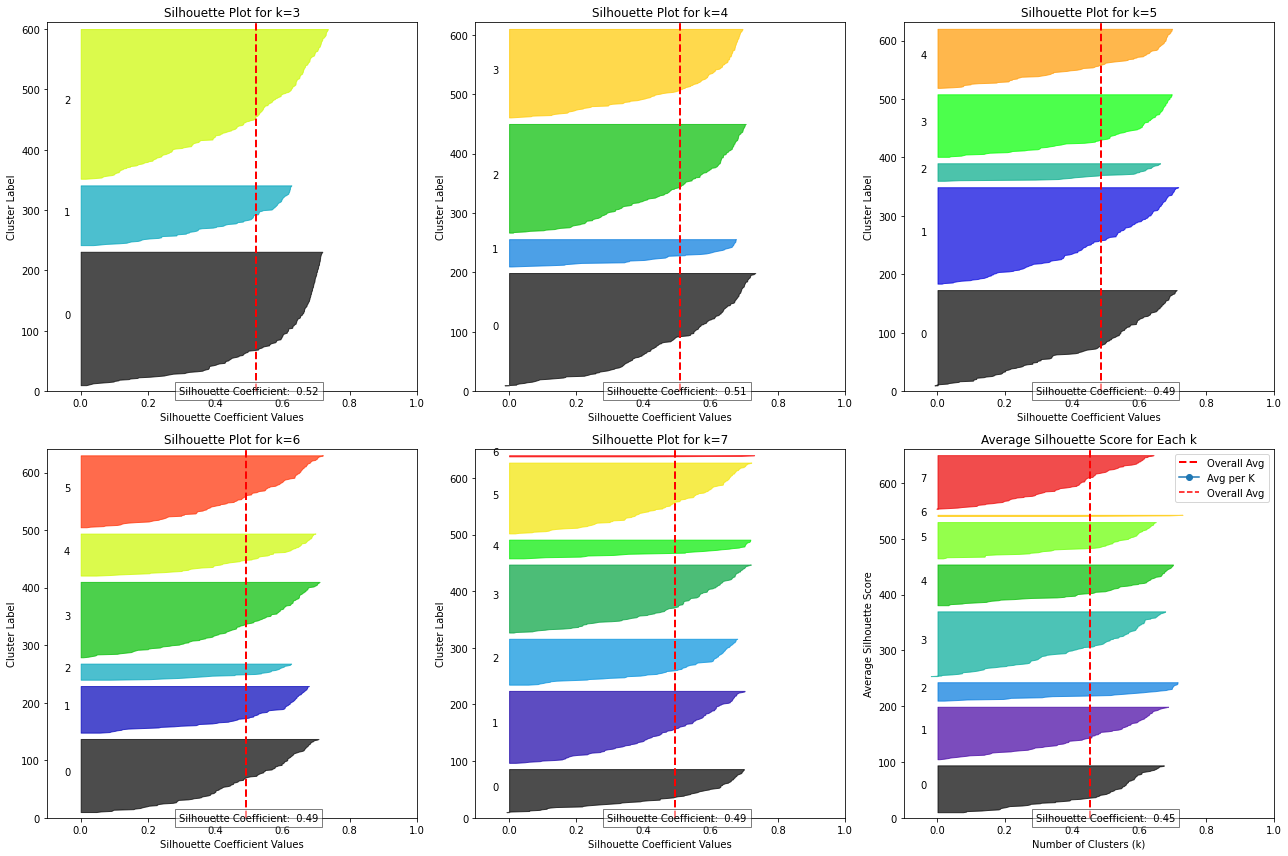

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
X = df[['Valence', 'Energy', 'Loudness']]

# Plotting existing supervised
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
k_values = [3, 4, 5, 6, 7, 8]  # Define the range of k values

# Added: Initialize lists to store average silhouette scores and overall averages
silhouette_avg_list = []
overall_avg_list = []

for i, k in enumerate(k_values):
    # Initialize KMeans model
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the model
    cluster_labels = kmeans_model.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Added: Append the average silhouette score to the list
    silhouette_avg_list.append(silhouette_avg)
    
    # Calculate silhouette values for each sample
    silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Plot silhouette plot
    ax = axs[i // 3, i % 3]
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    
    y_lower = 10
    
    for j in range(k):
        cluster_silhouette_values = silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()
        
        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        
        color = plt.cm.nipy_spectral(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        
        y_lower = y_upper + 10
    
    ax.set_title(f'Silhouette Plot for k={k}')
    ax.set_xlabel('Silhouette Coefficient Values')
    ax.set_ylabel('Cluster Label')
    
    # Added: Display silhouette coefficient scores on the plot.
    ax.text(0.5, -0.1, f'Silhouette Coefficient: {silhouette_avg : .2f}',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.5))
    
    # Added: Draw a vertical line for the overall average silhouette score
    overall_avg = np.mean(silhouette_values)
    overall_avg_list.append(overall_avg)
    ax.axvline(x=overall_avg, color='red', linestyle='--', linewidth=2, label='Overall Avg')

# Plot average silhouette scores
ax_avg = axs[1, 2]
ax_avg.plot(k_values, silhouette_avg_list, marker='o', label='Avg per K')
ax_avg.plot(k_values, overall_avg_list, linestyle='--', color='red', label='Overall Avg')
ax_avg.set_title('Average Silhouette Score for Each k')
ax_avg.set_xlabel('Number of Clusters (k)')
ax_avg.set_ylabel('Average Silhouette Score')
ax_avg.legend()

plt.tight_layout()
plt.show()

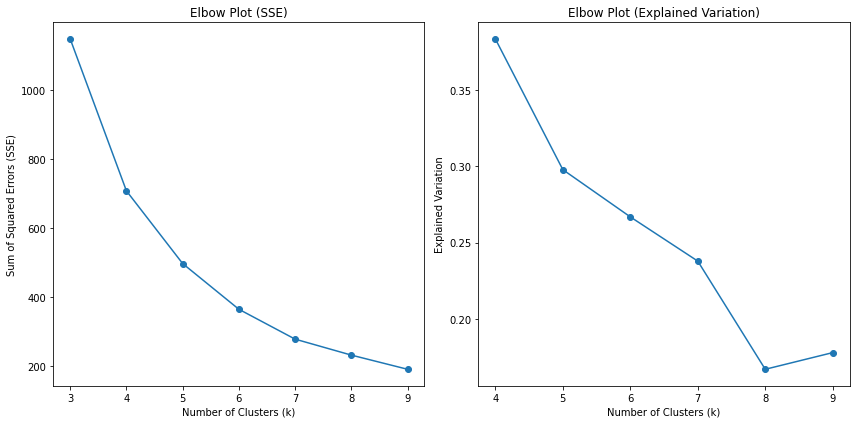

In [16]:
# can you insert elbow plots for k=3,4,5,6 for total Sum of squared errors and explained variation? 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values
k_values = range(3, 10)

# Lists to hold the SSE and explained variance
sse = []
explained_var = []

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans_model.fit(X)
    sse.append(kmeans_model.inertia_)
    if k != 3:
        explained_var.append((sse[-2] - sse[-1]) / sse[-2])

# Create the plot
plt.figure(figsize=(12, 6))

# Plot SSE
plt.subplot(121)
plt.plot(k_values, sse, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot (SSE)')

# Plot Explained Variance
plt.subplot(122)
plt.plot(k_values[1:], explained_var, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Explained Variation')
plt.title('Elbow Plot (Explained Variation)')

plt.tight_layout()
plt.show()

In [18]:
# can you show the k=6 clusters datapoint count and show the corresponding variables? I want to see everything about the clusterings so also plot the clusters 
from sklearn.cluster import KMeans
import numpy as np

# Fit KMeans model with k=6
kmeans_model = KMeans(n_clusters=6, random_state=42, n_init = 10)
kmeans_model.fit(X)

# Predict the cluster labels for data
labels = kmeans_model.predict(X)

# Get count of data points in each cluster
unique, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} data points")
    

# convert pandas DataFrame to numpy array for indexing purpose
X_np = X.to_numpy()  
for cluster in unique:
    cluster_data = X_np[labels == cluster]


Cluster 0: 128 data points
Cluster 1: 82 data points
Cluster 2: 29 data points
Cluster 3: 132 data points
Cluster 4: 74 data points
Cluster 5: 126 data points


In [19]:
# can you show the descriptive statistics of the clusters 
# Add cluster labels to dataset
X['Clusters'] = labels

# Group data by cluster labels and compute descriptive statistics 
cluster_stats = X.groupby('Clusters').describe()
cluster_stats

<ipython-input-19-11246a2a033f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clusters'] = labels


Valence 
 Energy 
 Loudness 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 count 
 mean 
 ... 
 75% 
 max 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 Clusters 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 128.0 
 0.440949 
 0.254376 
 0.0372 
 0.23200 
 0.4130 
 0.64475 
 0.962 
 128.0 
 0.702914 
 ... 
 0.82725 
 0.941 
 128.0 
 -8.023156 
 0.537064 
 -9.007 
 -8.42825 
 -8.0455 
 -7.57750 
 -7.092 
 
 
 1 
 82.0 
 0.579026 
 0.241578 
 0.0350 
 0.38075 
 0.6130 
 0.76500 
 0.976 
 82.0 
 0.813878 
 ... 
 0.91275 
 0.994 
 82.0 
 -4.023634 
 0.775726 
 -5.018 
 -4.61125 
 -4.1530 
 -3.66850 
 -1.609 
 
 
 2 
 29.0 
 0.310159 
 0.244999 
 0.0363 
 0.10600 
 0.2580 
 0.44100 
 0.962 
 29.0 
 0.320452 
 ... 
 0.42400 
 0.499 
 29.0 
 -16.135862 
 1.939512 
 -22.646 
 -15.91300 
 -15.5570 
 -15.14200 
 -14.388 
 
 
 3 
 132.0 
 0.380773 
 0.255591 
 0.0380 
 0.15275 
 0.3655 
 0.57225 
 0.970 
 132.0 
 0.588636 
 ... 
 0.69525 
 0.941 
 132.0 
 -10.093220 
 0.603633 
 -11.229 
 -10.56200 
 -10.0045 
 -9.56050 
 -9.073 
 
 
 4 
 74.0 
 0.338936 
 0.237278 
 0.0341 
 0.15700 
 0.2960 
 0.44150 
 0.933 
 74.0 
 0.503486 
 ... 
 0.59425 
 0.913 
 74.0 
 -12.385851 
 0.761589 
 -14.060 
 -12.80625 
 -12.2795 
 -11.75500 
 -11.297 
 
 
 5 
 126.0 
 0.504997 
 0.229092 
 0.0389 
 0.34675 
 0.5055 
 0.66525 
 0.966 
 126.0 
 0.765373 
 ... 
 0.88600 
 0.986 
 126.0 
 -6.106516 
 0.549584 
 -7.066 
 -6.61325 
 -6.0760 
 -5.68275 
 -5.077 
 
 
 
 6 rows × 24 columns

In [20]:
df['Cluster'] = X['Clusters']

In [21]:
# can you distribute the values in 'User Mood' column into[0,5] range? 
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler(feature_range=(1, 10))

# fit and transform the data
df['User Mood'] = scaler.fit_transform(df[['User Mood']])

In [22]:
df['User Mood'] = df['User Mood'].apply(lambda x: round(x * 2) / 2)

In [23]:
Q1 = df['User Mood'].quantile(0.25)
Q3 = df['User Mood'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_upper = Q3 + (1.5 * IQR)
outlier_threshold_lower = Q1 - (1.5 * IQR)

df = df[(df['User Mood'] <= outlier_threshold_upper) & (df['User Mood'] >= outlier_threshold_lower)]

In [24]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler(feature_range=(1, 10))

# fit and transform the data
df['User Mood'] = scaler.fit_transform(df[['User Mood']])

In [25]:
df['User Mood'] = df['User Mood'].apply(float)
df['User Mood'] = np.round(df['User Mood'] * 2) / 2

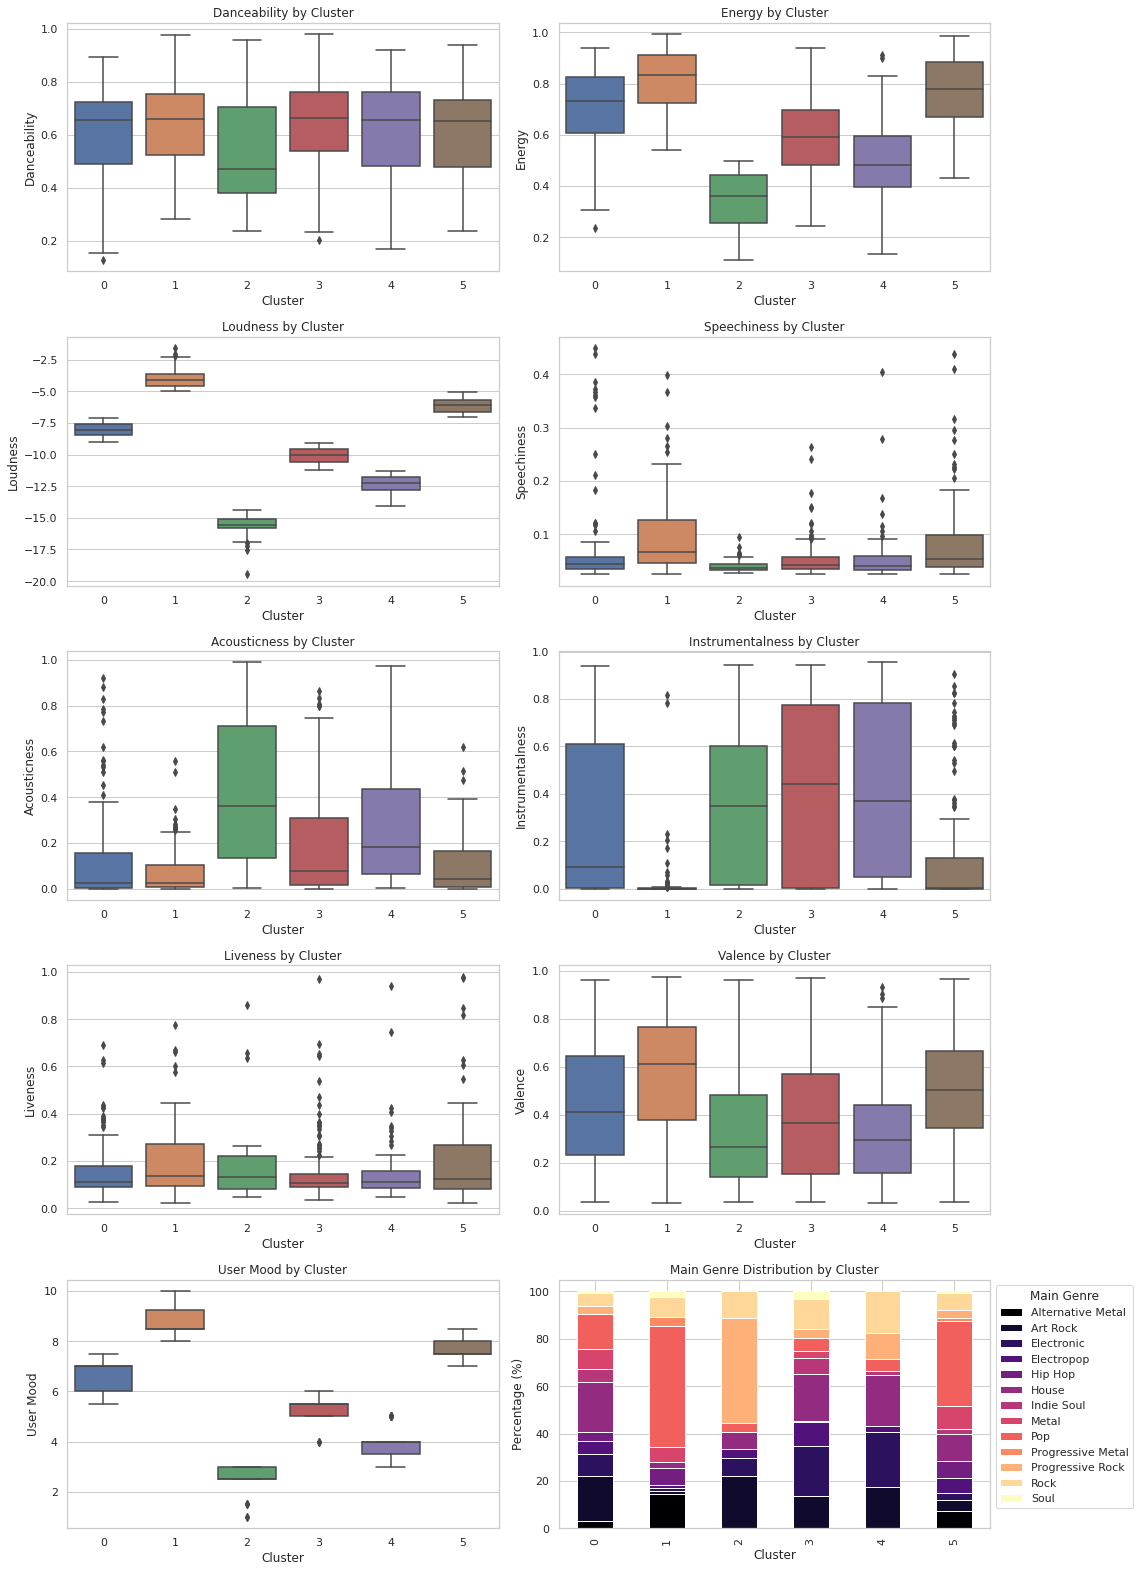

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create subplots for better organization
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 22))

# Features to visualize
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'User Mood']

# Add 'Main Genre' to the features
features.extend(['Main Genre'])

# Loop through features and create visualizations by cluster
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    # Use a stacked bar plot for 'Main Genre' by cluster
    if feature == 'Main Genre':
        # Create a DataFrame with the count of each genre by cluster
        genre_cluster_count = df.groupby(['Cluster', feature]).size().unstack(fill_value=0)
        
        # Normalize each row to represent the percentage of each genre in the cluster
        genre_cluster_percentage = genre_cluster_count.div(genre_cluster_count.sum(axis=1), axis=0) * 100
        
        # Plot the stacked bar plot
        genre_cluster_percentage.plot(kind='bar', stacked=True, ax=axes[row, col], colormap='magma')
        axes[row, col].set_title(f'{feature} Distribution by Cluster')
        axes[row, col].set_xlabel('Cluster')
        axes[row, col].set_ylabel('Percentage (%)')
        axes[row, col].legend(title=feature, bbox_to_anchor=(1, 1))
    else:
        # Box plot for other features by cluster
        sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} by Cluster')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [29]:
import pandas as pd

# Function to get valid user input in increments of 0.5
def get_user_input():
    while True:
        try:
            user_mood_input = float(input("Enter your mood from a scale of 1 to 10: "))

            if 1 <= user_mood_input <= 10:
                if user_mood_input % 0.5 == 0 or user_mood_input.is_integer():
                    return user_mood_input
                else:
                    raise ValueError("Invalid input. Please enter your number in increments of 0.5.")
            else:
                raise ValueError("Invalid input. Please enter a number between 1 and 10.")

        except ValueError as e:
            print(e)

# Function to get user-selected genres using option buttons
def get_selected_genres(all_genres):
    while True:
        print("\nSelect genres by typing the corresponding numbers separated by commas (e.g., 1, 3, 5) or type 'all' for All Genres:")
        for i, genre in enumerate(all_genres, start=1):
            print(f"{i}. {genre}")

        user_input = input("Enter genre numbers: ")

        if user_input.lower() == 'all':
            return all_genres

        try:
            selected_numbers = [int(num.strip()) for num in user_input.split(',')]
            selected_genres = [all_genres[num - 1] for num in selected_numbers if 0 < num <= len(all_genres)]
            if selected_genres:
                return selected_genres
            else:
                print("Invalid input. Please enter valid genre numbers.")
        except ValueError:
            print("Invalid input. Please enter valid genre numbers.")

# Get valid user input for mood
user_mood_input = get_user_input()

# Find user moods within a 0.5 range
selected_clusters = df[(df['User Mood'] >= user_mood_input - 0.5) & (df['User Mood'] <= user_mood_input + 0.5)]['Cluster']

# Get unique genres from the 'Main Genre' column
all_genres = df['Main Genre'].unique()

# Get user-selected genres
selected_genres = get_selected_genres(all_genres)

# Generate Playlist
if 'All Genres' in selected_genres:
    playlist = df[df['Cluster'].isin(selected_clusters)][['Track Name', 'Artist(s)', 'Main Genre', 'Album']]
else:
    while True:
        filtered_df = df[(df['Cluster'].isin(selected_clusters)) & (df['Main Genre'].isin(selected_genres))][['Track Name', 'Artist(s)', 'Main Genre', 'Album']]
        if not filtered_df.empty:
            playlist = filtered_df
            break
        else:
            print("No playlist found for the selected genres. Please try again with different genres.")
            selected_genres = get_selected_genres(all_genres)

# Display Playlist
print("\nGenerated Playlist:")
playlist

Enter your mood from a scale of 1 to 10:  6

Select genres by typing the corresponding numbers separated by commas (e.g., 1, 3, 5) or type 'all' for All Genres:
1. Electropop
2. Indie Soul
3. House
4. Electronic
5. Pop
6. Metal
7. Alternative Metal
8. Hip Hop
9. Progressive Metal
10. Rock
11. Progressive Rock
12. Art Rock
13. Soul
Enter genre numbers:  All

Generated Playlist:


,Track Name,Artist(s),Main Genre,Album
1,Dorothy,Polo & Pan,Electropop,Caravelle
2,Rivolta,Polo & Pan,Electropop,Dorothy
3,Caur d'artichaut,Polo & Pan,Electropop,Dorothy
5,On You,Kazy Lambist,Electropop,On You - Single
6,Hometown,French 79,Electropop,Joshua
...,...,...,...,...
555,Half the Man,Jamiroquai,Pop,The Return of the Space Cowboy (Remastered)
557,Blow Your Mind,Jamiroquai,Pop,Emergency on Planet Earth (Remastered)
558,Them Changes,Thundercat,Indie Soul,Drunk
565,King for a Day,Jamiroquai,Pop,Synkronized
